In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [27]:
import numpy as np
import pandas as pd 

In [28]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
16,17,5.4,3.9,1.3,0.4,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica
48,49,5.3,3.7,1.5,0.2,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica
110,111,6.5,3.2,5.1,2.0,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa


In [30]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  152.000000     151.000000    150.000000     150.000000    151.000000
mean    76.500000       5.843709      3.054000       3.758667      1.202649
std     44.022721       0.825314      0.433594       1.764420      0.762185
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.750000       5.100000      2.800000       1.600000      0.300000
50%     76.500000       5.800000      3.000000       4.350000      1.300000
75%    114.250000       6.400000      3.300000       5.100000      1.800000
max    152.000000       7.900000      4.400000       6.900000      2.500000


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [31]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [32]:
df.median()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [33]:
df.fillna(df.median(),inplace = True)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [36]:
# df['Species'] = pd.factorize(df['Species'])[0]


df['Species'] = df['Species'].astype('category').cat.codes
print(df['Species'].unique())

[0 1 2]


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [39]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [ ]:
# nothing is in range of -0.1 to 0.1

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [42]:
np.var(df)

Id               1925.250000
SepalLengthCm       0.672194
SepalWidthCm        0.184331
PetalLengthCm       3.056276
PetalWidthCm        0.573344
Species             0.670880
dtype: float64

In [ ]:
# no such variables having no variance or almost zero variance(variance < 0.1)


In [48]:
df.drop('Id' , axis = 1 , inplace = True)

KeyError: "['Id'] not found in axis"

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D4E9D68>,
      dtype=object)

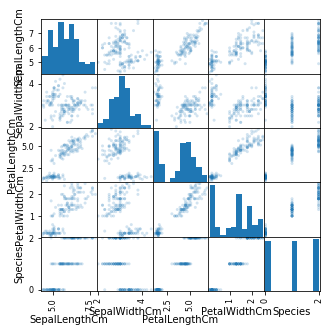

In [51]:
pd.scatter_matrix(df ,alpha = 0.2 , figsize = (5,5))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [52]:
from sklearn.model_selection import train_test_split

X =  df.drop('Species',axis=1)
Y =  df.pop('Species')

In [57]:
train_set, test_set, train_labels, test_labels, = train_test_split(X, Y, test_size=0.20, random_state=0)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNH3 = KNeighborsClassifier(n_neighbors = 3  , weights = 'uniform' , metric = 'euclidean')
KNH3.fit(train_set , train_labels)
predicted_label3 = KNH3.predict(test_set)

In [65]:
accuracy_score(test_labels,predicted_label3,normalize=True)

0.967741935483871

In [70]:
KNH5 = KNeighborsClassifier(n_neighbors = 5  , weights = 'uniform' , metric = 'euclidean')
KNH5.fit(train_set , train_labels)
predicted_label5 = KNH3.predict(test_set)

In [69]:
accuracy_score(test_labels,predicted_label5,normalize=True)

0.967741935483871

In [74]:
KNH9 = KNeighborsClassifier(n_neighbors = 9  , weights = 'uniform' , metric = 'euclidean')
KNH9.fit(train_set , train_labels)
predicted_label9 = KNH9.predict(test_set)

In [75]:
accuracy_score(test_labels,predicted_label9,normalize=True)

0.967741935483871

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [ ]:
for i in 

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*